# MFE 230M Homework 3
## Alexander Damiani, Zhongnan Fang, Linshan Li, Kunming Wu

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

### The import will take up to 5 min. 
### Note that we use 1000 paths + 1000 antithetic paths in the simulation. The num_sims parameter can be changed in interest_rates module to increase accuracy.

In [2]:
import interest_rates as ir

Running optimization to calibrate Hull White model...
Running Monte Carlo simulation to obtain short rates...
Finished Importing interest_rates


In [3]:
import water_fall as wf

Finished Importing water_fall


In [10]:
import bond_prices as bp

## 1. Calibrate the Hull and White Model for June 30, 2009 and report your results.
### Please refer to the interest_rates Python module

kappa: 0.3049004569750132
sigma: 0.020644080934538542


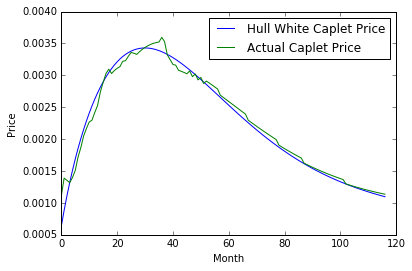

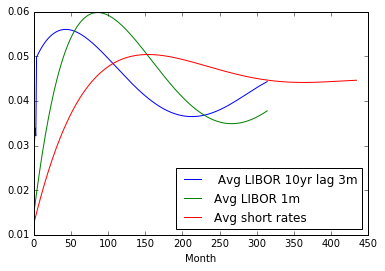

In [6]:
print('kappa: {}'.format(ir.kappa))
print('sigma: {}'.format(ir.sigma))

plt.plot(ir.calibrate_HW(ir.kappa,ir.sigma),label='Hull White Caplet Price')
plt.plot(ir.cap_prices,label='Actual Caplet Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.plot(ir.avg_libor_10yr_lag_3m_arr,label=' Avg LIBOR 10yr lag 3m')
plt.plot(ir.avg_libor_1m_arr,label='Avg LIBOR 1m')
plt.plot(ir.final_r_matrix.mean(0),label='Avg short rates')
plt.xlabel('Month')
plt.legend(loc='lower right')
plt.show()

## 2. Fit the coefficient estimates for the four hazards and report the results.
### Please refer to the MATLAB script: get_hazard_model_param.m
### We present the output from the script here.

#### Estimating prepayment rate parameters for ARM...

Output order is [gamma], [p], [beta_coupon_gap], [beta_summer_ind]

Performing Maximum Likelihood with log-logistic Distribution...
 
LnLike      26850.61081

|           |gamma     | p        | beta_coupon_gap| beta_summer_ind|
| ----------|:--------:| --------:|---------------:|---------------:|
|haz_params | 0.00969  |1.58324   |-100.00000      |-0.21451        |
|param_se   | 0.00059  |0.02369   |7.59822         |0.03535         |
|t_stats    | 16.3169  |66.8209   |-13.1610        |-6.0675         |
|gradient   | -0.00000 |0.00000   |3.38972         |0.00000         |
 
Elapsed time is 14.462471 seconds.

#### Estimating default rate parameters for ARM...

Output order is [gamma], [p], [ltv]

Performing Maximum Likelihood with log-logistic Distribution...
 
LnLike      13294.16118

|           |gamma     | p        | ltv   |
| ----------|:--------:| --------:|------:|
|haz_params | 0.01935  |8.00000   |2.12374|
|param_se   | 0.00043  |0.11581   |0.19580|
|t_stats    | 45.4522  |69.0770   |10.8463|
|gradient   |0.00000   |-50.90830 |0.00000|
 
Elapsed time is 15.169382 seconds.

#### Estimating prepayment rate oarameters for FRM...

Output order is [gamma], [p], [beta_coupon_gap], [beta_summer_ind]

Performing Maximum Likelihood with log-logistic Distribution...
 
LnLike      30101.46499

|           |gamma     | p        | beta_coupon_gap| beta_summer_ind|
| ----------|:--------:| --------:|---------------:|---------------:|
|haz_params | 0.00452  |1.86511   |38.65015        |0.01444         |
|param_se   | 0.00028  |0.02441   |4.68571         |0.03314         |
|t_stats    | 16.1371  |76.4084   |8.2485          |0.4358          |
|gradient   | 0.82594  |0.00187   |-0.00004        |-0.00003        |

Elapsed time is 32.452440 seconds.

#### Estimating default rate oarameters for FRM...

Output order is [gamma], [p], [ltv]

Performing Maximum Likelihood with log-logistic Distribution...
 
LnLike      5307.56975

|           |gamma     | p        | ltv    |
| ----------|:--------:| --------:|-------:|
|haz_params | 0.02003  |8.00000   |-0.02669|
|param_se   | 0.00041  |0.20704   |0.14031 |
|t_stats    | 48.7447  |38.6393   |-0.1902 |
|gradient   | 0.00007  |-17.38296 |0.00000 |
 
Elapsed time is 18.341323 seconds.

## 3. Use the hazard estimates, the HW model of interest rates, and the asset price process to model the cash flows for the FRM and ARM pools (Note: For simplicity, we will model cash flows at the pool level). What price, as a percentage of par, do you find for the M-2 and M-5 bonds.
### Please refer to the water_fall and bond_prices Python modules.

### Average Prices
#### Note that we use the origination date data for percentage of par price.

In [15]:
tranches = ["A1","A2","A3","M1","M2","M3","M4","M5","M6","M7","M8","M9","M10"]
par_prices = [396254000, 171485000, 24954000, 38481000, 30150000, 18646000, 16265000, 15075000, 13488000, \
              13092000, 11505000, 9124000, 10315000]
pd.options.display.float_format = '{:,.2f}'.format
A_tranches = pd.DataFrame([bp.avg_bond_price[:3], bp.std_bond_price[:3], bp.avg_bond_price[:3]/par_prices[:3]])
A_tranches.columns = tranches[:3]
A_tranches.insert(0, 'Description', ['Avg Price', 'Std Price', 'Percentage of Par'])
A_tranches

,Description,A1,A2,A3
0,Avg Price,0.00,"108,159,232.68","26,320,107.48"
1,Std Price,0.00,"9,794.21","1,984.39"
2,Percentage of Par,0.00,0.63,1.05


In [16]:
M_tranches = pd.DataFrame([bp.avg_bond_price[3:],bp.std_bond_price[3:], bp.avg_bond_price[3:]/par_prices[3:]])
M_tranches.columns = tranches[3:]
M_tranches.insert(0, 'Description', ['Avg Price', 'Std Price', 'Percentage of Par'])
M_tranches

,Description,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10
0,Avg Price,"40,521,973.17","31,625,041.46","19,499,366.09","17,020,499.15","15,749,517.43","14,071,455.35","13,759,902.64","649,299.80",0.00,0.00
1,Std Price,"2,658.26","1,780.16",971.81,758.27,628.42,487.51,373.16,12.81,0.00,0.00
2,Percentage of Par,1.05,1.05,1.05,1.05,1.04,1.04,1.05,0.06,0.00,0.00


## 4. Assuming that you are the buyer of CDS written on M-2 and M-5 bonds, compute the NPVs for these positions assuming that you purchase the CDS on June 30, 2009 based on their quoted coupons and up-front premia (See Table 3). How would you interpret these results? Should you be long or short the CDS? What kind of valuation errors are you making by modeling at the pool-level? 

### Please refer to Q4.py for this question.

|                            |M2 Tranche   |M5 Tranche   |
|---------------------------:|------------:|------------:|
|Bond Principal June 30, 2009|\$30,150,000 |\$15,075,000 |
|Buyer’s Cost                |\$10,265,368 |\$11,113,059 |
|Seller’s Cost               |\$17,507,798 |\$8,773,243  |


- How would you interpret these results?

    - The buyer’s side of the CDS pays an upfront premium and a fixed coupon on the remaining principal at each time step. Remaining principal is defined as previous period’s principal minus the defaulted principal, principal payment, and prepayment.

    - The seller’s side of the CDS pays a variable amount. They pay one minus the recovery rate,0.40, for any defaulted principal. They also pay 100% of any interest or principal that was guaranteed for a period but not paid out. An important assumption we make is that principal is never guaranteed. The tranches’ principals are paid from top to bottom, A1 to M10, and at no time is any principal guaranteed to any tranche. Another important note is the seller’s side does not compensate for prepayment.

    - For the M2 tranche, the buyer’s total cost is less than the seller’s total cost. This indicates that the amount of principal defaulted was sufficient compared to the amount of principal prepaid in order for this to happen. Since the seller doesn’t compensate for prepayment and only for default and missed principal or interest, it must be the case that the seller’s variable cost rose past the fixed cost of the buyer due to defaulted principal. The fixed cost of the buyer here is the fixed coupon plus the upfront premium.

    - For the M5 tranche the opposite is true. The amount of principal defaulted must have been sufficient compared the amount of principal defaulted for the buyer’s cost to rise past the seller’s cost. Since the seller doesn’t cover prepayments in the CDS contract, the amount of prepayments must have outweighed the payments the seller had to make, compared to the fixed coupon cost and upfront premium cost of the buyer.

    - Interpreting the results of the M2 and M5 tranche together we can make the conclusion that one would want to be long CDS on tranches at M2 and above, but short CDS on tranches M5 and below. We make these conclusions based on the fixed prices of the buyer’s side of the contract, and assuming the quoted upfront premium and coupon follow a linear trend among all tranches. If the fixed price parameters were to change, we could get entirely different results.

- Should you be long or short the CDS?

    - For the M2 tranche, we want to be long the CDS since the total buyer’s cost is less than the total seller’s cost.

    - For the M5 tranche, we want to be short the CDS since the total seller’s cost is less than the total buyer’s cost.

- What kind of valuation errors are you making by modeling at the pool-level?

    - One error arises from our default covariate. We estimate the default covariate by calculating the LTV ratio which equals the ratio of remaining principal divided by the home price. The home price is initially set as the entire principal of the pool. Then the change is house price is simulated as a function of the riskless short rate, the rental flow rate, and the volatility. While all three of these factors are very indicative of the future housing price, there is an error term subject to missing information. However, on an aggregate pool level scale it is only possible to be so granular in our modeling of housing prices. The alternative would be to model each house price over our time interval individually. By modeling individually, we could incorporate many more informative factors such as location, initial price, and other demographics. This would lead to a more accurate home price at each time step, which would lead to a more accurate default covariate. This would allow us to model default payments at each time step more accurately, while right now we undoubtedly have variance in the values we are calculating as default payments over the time series.

    - By having a more accurate value of defaulted principal at each time step, our estimate for the CDS seller’s total cost also becomes more accurate. This is because the seller must compensate for one minus the recovery rate for all defaulted principal. Therefore, a more accurate modeling of home prices leads to a more accurate modeling of default rates, which leads to a more accurate valuation of the seller’s total cost. An accurate estimation of the seller’s cost is essential in order for us to determine which position to take in the CDS with the highest probability of a positive payoff, and also to identify mispricings and potentially exploit them. 


## Appendix

### SMM for prepayment and default
#### Notice that the default SMM seems a bit too high for out of sample prediction.

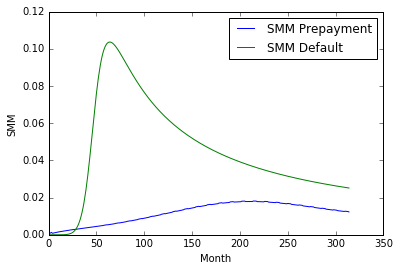

In [12]:
plt.plot(wf.SMM_P_m.mean(0),label='SMM Prepayment')
plt.plot(wf.SMM_D_m.mean(0),label='SMM Default')
plt.xlabel('Month')
plt.ylabel('SMM')
plt.legend()
plt.show()